In [1]:
import sklearn.linear_model as lm
from sklearn import linear_model
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Singapore_Population.csv')

In [3]:
df.head()

,Data Series,Total Population,Resident Population,Singapore Citizen Population,Permanent Resident Population,Non-Resident Population,Total Population Growth,Resident Population Growth,Population Density,Sex Ratio,...,Old-Age Support Ratio.2,Age Dependency Ratio.2,Child Dependency Ratio.2,Old-Age Dependency Ratio.2,Old-Age Support Ratio.3,Age Dependency Ratio.3,Child Dependency Ratio.3,Old-Age Dependency Ratio.3,Natural Increase,Rate Of Natural Increase
0,2021,5453566,"3,986,842.00","3,498,191.00","488,651.00","1,466,724.00",-4.1,-1.4,"7,485.00",960,...,3.8,48.7,22.5,26.2,3.5,61.4,33,28.5,na,na
1,2020,5685807,"4,044,210.00","3,523,191.00","521,019.00","1,641,597.00",-0.3,0.4,"7,810.00",957,...,4.1,46.8,22.2,24.6,3.7,59.7,32.9,26.8,16536,3.3
2,2019,5703569,"4,026,209.00","3,500,940.00","525,269.00","1,677,360.00",1.2,0.8,"7,866.00",957,...,4.3,45.2,22,23.2,4,58.4,33.1,25.3,17833,3.7
3,2018,5638676,"3,994,283.00","3,471,936.00","522,347.00","1,644,393.00",0.5,0.7,"7,804.00",959,...,4.6,43.7,21.9,21.8,4.2,57,33.2,23.8,17757,3.7
4,2017,5612253,"3,965,796.00","3,439,177.00","526,619.00","1,646,457.00",0.1,0.8,"7,796.00",961,...,4.9,42.5,21.9,20.6,4.4,56.2,33.7,22.6,18710,4.0


In [4]:
df.describe()

,Data Series,Total Population,Total Population Growth
count,72.00000,7.200000e+01,72.000000
mean,1985.50000,3.129033e+06,2.451389
std,20.92845,1.432383e+06,1.681129
min,1950.00000,1.022100e+06,-4.100000
25%,1967.75000,2.003400e+06,1.400000
50%,1985.50000,2.734665e+06,2.450000
75%,2003.25000,4.168986e+06,3.400000
max,2021.00000,5.703569e+06,5.700000


In [5]:
df['Total Population'] = df['Total Population'].astype(float)

## The total population vs year

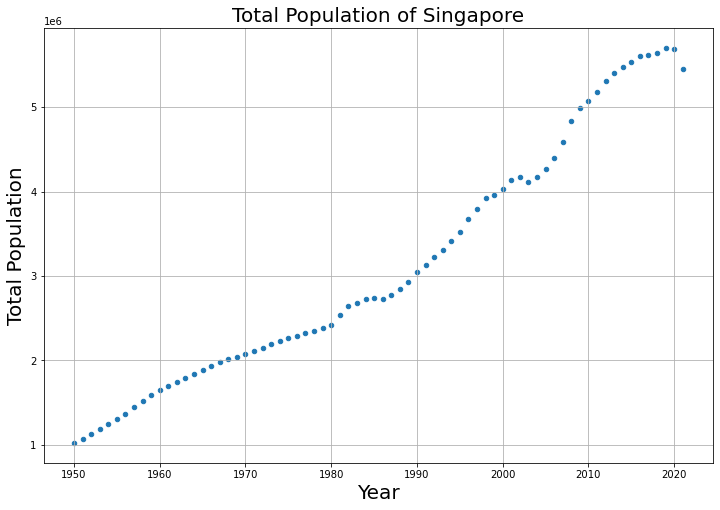

In [6]:
X = df[['Data Series', 'Total Population']].values
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.title("Total Population of Singapore", fontsize=20) 
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Population', fontsize=20)
plt.grid()

### The growth of total population vs year

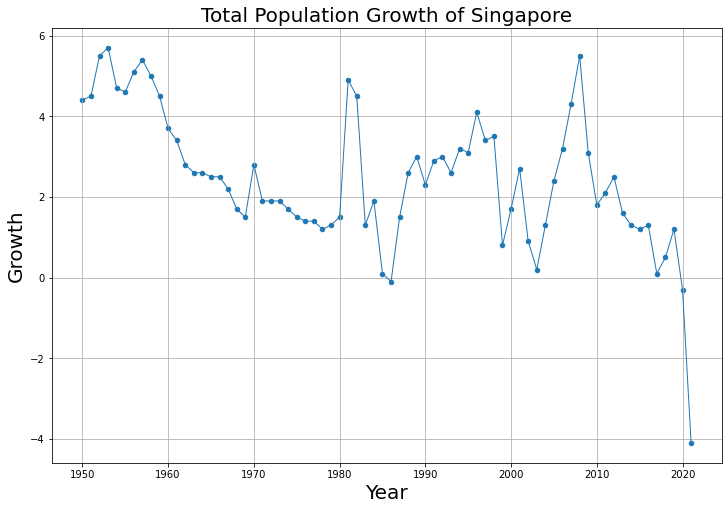

In [7]:
X = df[['Data Series', 'Total Population Growth']].values
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1] , s=20)
plt.plot(X[:, 0], X[:, 1] , linewidth=1)
plt.title("Total Population Growth of Singapore", fontsize=20) 
plt.xlabel('Year', fontsize=20)
plt.ylabel('Growth', fontsize=20)
plt.grid()

## Linear Regression
Use linear regression to build an estimator of the total population of Singapore in the future. Use the data for years 2013 and earlier as training data.

In [8]:
x = df[['Data Series']].values
y = df[['Total Population']].values

x_test = x[:8]
x_train = x[-64:]
y_test = y[:8]
y_train = y[-64:]

In [9]:
lr = linear_model.LinearRegression()
# fit
lr.fit(x_train, y_train)

LinearRegression()

## Parameters

1. the slope and y-intercept of the best fit line and plot the best fit line over the empirical data.

In [10]:
print('Slope:',' '.join(f'{c:.2f}' for c in lr.coef_[0]))
print('Intercept:', f'{lr.intercept_[0]:.2f}')

Slope: 63343.23
Intercept: -122692970.63


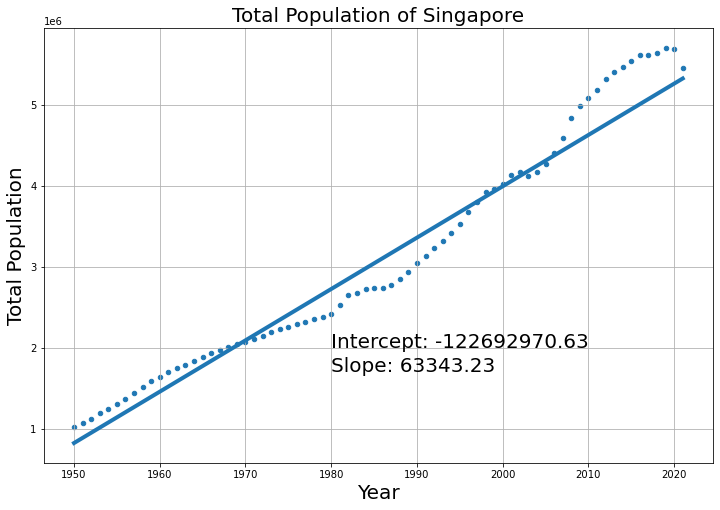

In [11]:
w = lr.coef_
b = lr.intercept_

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
#add points to plot
plt.scatter(x, y, s=20)

#add line of best fit to plot
plt.plot(x, w*x+b, linewidth=4)

ax.text(1980,2e6,"Intercept: "+str(f'{lr.intercept_[0]:.2f}'), fontsize=20)
ax.text(1980,1.7e6,"Slope: "+str(' '.join(f'{c:.2f}' for c in lr.coef_[0])), fontsize=20)
plt.title("Total Population of Singapore", fontsize=20) 
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Population', fontsize=20)
plt.grid()

2. Use years greater than 2013 as test data and predict the population for those years.

In [12]:
y_predict=lr.predict(x_test)
for i in range(8):
    print(2021-i,":"," Prediction:",str(' '.join(f'{c:.2f}' for c in y_predict[i]))," True:",str(' '.join(f'{c:.2f}' for c in y_test[i])))

2021 :  Prediction: 5323689.64  True: 5453566.00
2020 :  Prediction: 5260346.41  True: 5685807.00
2019 :  Prediction: 5197003.19  True: 5703569.00
2018 :  Prediction: 5133659.96  True: 5638676.00
2017 :  Prediction: 5070316.74  True: 5612253.00
2016 :  Prediction: 5006973.51  True: 5607283.00
2015 :  Prediction: 4943630.28  True: 5535002.00
2014 :  Prediction: 4880287.06  True: 5469724.00


In [13]:
print("Prediction for 2030 and 2050:")
y_2030 = w*2030+b
y_2050 = w*2050+b
print(2030,":",' '.join(f'{c:.2f}' for c in y_2030[0]))
print(2050,":",' '.join(f'{c:.2f}' for c in y_2050[0]))

Prediction for 2030 and 2050:
2030 : 5893778.68
2050 : 7160643.20


3. The mean squared error (MSE) of the estimator on the training data and test data

In [14]:
def calculateMSE(X,Y,m,b): 
    return sum([(y-m*x -b)**2 for x,y in zip(X,Y)])/len(X)

In [15]:
mse_train = calculateMSE(x_train,y_train,w,b)
mse_test = calculateMSE(x_test,y_test,w,b)
print("Mean Squared Error for train data: ",' '.join(f'{c:.2f}' for c in mse_train[0]))
print("Mean Squared Error for test data: ",' '.join(f'{c:.2f}' for c in mse_test[0]))

Mean Squared Error for train data:  55496493545.96
Mean Squared Error for test data:  257594689765.74


In [16]:
y_predict=lr.predict(x)
nmse_train = np.sum((y_train - y_predict[-64:])**2) / np.sum((y_train - np.mean(y))**2)
nmse_test = np.sum((y_test - y_predict[:8])**2) / np.sum((y_test - np.mean(y))**2)
print("Normalized MSE for train data:", nmse_train)
print("Normalized MSE for test data:", nmse_test)

Normalized MSE for train data: 0.03652981849117039
Normalized MSE for test data: 0.04254007327940072


4. The R2 coefficient for the best fit line

In [17]:
from sklearn.metrics import r2_score
y_predict=lr.predict(x)
print("R2: ", r2_score(y, y_predict))

R2:  0.9614714944982808


## Few good ways to see the change of Singapore population

### Total Population

In [18]:
df = pd.read_csv("Singapore_population.csv",header=None)

In [19]:
time = df.iloc[1:][0]
years = []
for i in time:
    i = int(i)
    years.append(i)

population = df.iloc[1:][1]
num = []
for i in population:
    i = int(i)
    num.append(i)

In [20]:
from pyecharts.charts import Bar, Timeline
from pyecharts import options as opts
from pyecharts.globals import ThemeType

years = years[::-1]
num = num[::-1]

timeline = Timeline()
timeline.add_schema(is_auto_play=True, play_interval=30,
                    is_loop_play=False)
 
for i in range(len(years)):
    bar = (
            Bar(init_opts=opts.InitOpts(theme=ThemeType.ROMANTIC, width="6000px",height='4000px'))
            .add_xaxis(years[:i+1])
            .add_yaxis("", num[:i+1],itemstyle_opts=opts.ItemStyleOpts(color="DarkCyan"),category_gap="46%")
            .extend_axis(
                yaxis=opts.AxisOpts()
            )
            .set_global_opts(title_opts=opts.TitleOpts(title='Total population of Singapore vs year', pos_left="center",subtitle='1950-2021'),
                             yaxis_opts=opts.AxisOpts(min_=1000000, max_=6000000,name='Total population'))
            .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        )
    timeline.add(bar, "{}".format(years[i]))  
timeline.render_notebook()

### Rate Of Natural Increase

In [21]:
def toint(column,new_column):
    for i in column:
        i = int(float(i))
        new_column.append(i)
    return new_column

def tofloat(column,new_column):
    for i in column:
        i = float(i)
        new_column.append(i)
    return new_column

def tostr(column,new_column):
    for i in column:
        i = str(i)
        new_column.append(i)
    return new_column

In [22]:
import pyecharts.options as opts
from pyecharts.charts import Line

year = []
for i in years:
    i = str(i)
    year.append(i)
year=year[::-1]
rate = df.iloc[2:][29]

new_rate = []
new_rate = tofloat(rate,new_rate)
new_rate=new_rate[::-1]
# print(new_rate)

c = (
        Line()
        .add_xaxis(year)
        .add_yaxis(
            "Rate Of Natural Increase",
            new_rate,
            itemstyle_opts=opts.ItemStyleOpts(color="DarkCyan"),
             markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
            markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max"),opts.MarkPointItem(type_="min")]),  #point    
        )
        .set_global_opts(title_opts=opts.TitleOpts(title="Line-MarkLine"))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    )
c.render_notebook()

### Median Age Of Resident Population

In [23]:
from pyecharts.charts import Bar, Timeline
from pyecharts import options as opts
from pyecharts.globals import ThemeType

mid = df.iloc[1:66][10]
mid_age = []
mid_age = tofloat(mid,mid_age)
mid_age = mid_age[::-1]

time_ = df.iloc[1:66][0]
years_ = []
years_ = toint(time_,years_)
years_ = years_[::-1]

timeline = Timeline()
timeline.add_schema(is_auto_play=True, play_interval=30,
                    is_loop_play=False)

for i in range(len(years_)):
    bar = (
            Bar(init_opts=opts.InitOpts(theme=ThemeType.ROMANTIC, width="6000px",height='4000px'))
            .add_xaxis(years_[:i+1])
            .add_yaxis("", mid_age[:i+1],itemstyle_opts=opts.ItemStyleOpts(color="DarkCyan"),category_gap="46%")
            .extend_axis(
                yaxis=opts.AxisOpts()
            )
            .set_global_opts(title_opts=opts.TitleOpts(title='Median Age Of Resident Population', pos_left="center",subtitle='1957-2021'),
                             yaxis_opts=opts.AxisOpts(min_=10, max_=60,name='Median Age'))
            .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        )
    timeline.add(bar, "{}".format(years_[i])) 

timeline.render_notebook()

### Old-Age Dependency Ratio

In [24]:
import pyecharts.options as opts
from pyecharts.charts import Line

ratio = df.iloc[1:66][19]
old_ratio = []
old_ratio = tofloat(ratio,old_ratio)
old_ratio = old_ratio[::-1]
# print(old_ratio)

years__ = []
years__ = tostr(years_,years__)
# print(years__)

c = (
        Line()
        .add_xaxis(years__)
        .add_yaxis(
            "Old-Age Dependency Ratio",
            old_ratio,
            itemstyle_opts=opts.ItemStyleOpts(color="DarkCyan"),
             markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]),
            markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max"),opts.MarkPointItem(type_="min")]),  #point
        )
        .set_global_opts(title_opts=opts.TitleOpts(title="Line-MarkLine"))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    )
c.render_notebook()